#Introduction

---



---


A financial institution's credit card division stands out as one of the primary champions of data science. A key emphasis for the bank has always been expanding its base of credit card clients. Issuing credit cards without conducting thorough research or assessing the financial viability of applicants carries substantial risk. The credit card department has long relied on a data-centric approach to evaluate creditworthiness, employing a model referred to as an application scorecard. The application scorecard determines the threshold value for credit card applications, also aiding in gauging the applicant's risk level. This determination is based on the bank's current strategic priorities.

To apply for a credit card, customers must complete either a physical or online application form. The application data serves as the basis for assessing the applicant's creditworthiness. The decision-making process relies on the application data in conjunction with the Credit Bureau Score, such as the FICO Score in the United States or the CIBIL Score in India, as well as other internal information pertaining to the applicants. Furthermore, financial institutions are increasingly exploring various external data sources to enhance the quality of their credit assessments.

# **Objectives of the study**

---



---


The primary aim of this assignment is to mitigate risk while optimizing the bank's profitability. The bank must make well-informed decisions based on applicants' profiles to minimize potential losses from the bank's standpoint. The bank takes into account applicants' characteristics, such as their occupation, income bracket, and family background, when deciding whether to approve or decline a credit card application. The dataset containing customer credit card information encompasses numerous variables, and a classification approach is employed to assess the creditworthiness of each applicant.

In this project, we employ exploratory data analysis (EDA) as a data exploration technique to gain insights, uncover novel relationships, apply innovative methodologies, and unearth patterns within the data. It is imperative to apply sound reasoning at each step in order to align with the primary objective of this study.

| Features | Values |
| --- | --- |
|*Ind_ID*|	Client ID|
|*Approval_status*|	0 is application not approved and 1 is approved|
|*Gender*|Gender information|
|*Car_owner*|Having car or not|
|*Propert_owner*|	Having property or not|
|*Children*|	Count of children|
|*Annual_income*|	Annual income|
|*Type_Income*|	Income type|
|*Education*|	Education level|
|*Marital_status*|	Marital_status|
|*Housing_type*|	Living style|
|*Birthday_count*|	Use backward count from current day (0), -1 means yesterday|
|*Employed_days*|	Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed|
|*Mobile_phone*|	Any mobile phone|
|*Work_phone*|	Any work phone|
|*Phone*|	Any phone number|
|*EMAIL_ID*|	Any email ID|
|*Type_Occupation*|	Occupation|
|*Family_Members*|	Family size|

# Credit_card_label

| Features | Values |
| --- | --- |
|ID| The joining key between application data and credit status data, same is Ind_ID|
|Label| 0 is application Not Approved and 1 is Approved|

In [ ]:
# Import libraries

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings('ignore')

# Numpy & Math is used for Mathematical operations
import numpy as np
import math

# Pandas is used for Data manipulaiton and analysis
import pandas as pd

# Matplotlib, Plotly and seaborn is used for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as po

# Joining Both Table Together

In [ ]:
card = pd.read_excel("/Credit_card.xlsx")
card_label = pd.read_excel("/Credit_card_label.xlsx")

In [ ]:
data = pd.merge(card,card_label, on='Ind_ID', how='inner')
data1 = data.copy()

# Exploratory Data Analysis

In [ ]:
data1.head() #First 5 Rows of data1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
data1.tail() #last 5 rows of the data1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
data1.shape
print("Total Number of Rows in Dataset  :",data1.shape[0])
print("Total Number of Columns in Dataset:",data1.shape[1])

Total Number of Rows in Dataset  : 1548
Total Number of Columns in Dataset: 19


By inspecting the results obtained from the <font color=red>**Head**</font> and <font color=red>**Tail**</font> commands, it is evident that the dataset exhibits the presence of missing values (NaN) and inappropriate data types assigned to certain variables.

In [ ]:
data1.info() # Checking for all the details about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Within the dataset, there are a total of 11 numerical variables and 8 categorical variables. However, there are a few data type discrepancies, where:


1.   The "Birthday_count" variable should be integer, but it should be considered float.
2.   The "Employed_days" variable, which provides information about employment status, is currently classified as an integer. It might be more appropriate to convert it to a categorical data type, as it represents employed or unemployed categories.





Additionally, it's noted that the variables "Mobile_phone," "Work_Phone," "Phone," and "EMAIL_ID" are present in the dataset but are deemed unnecessary for the analysis.

In [ ]:
data1.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True, axis=1)

In [ ]:
data1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'label'],
      dtype='object')

It's noticeable that the variables within the dataset have inconsistent casing, with some in uppercase and others in proper case. To simplify data manipulation, it is good can convert all variables to lowercase.

In [ ]:
credit = data1.rename(columns = {'Ind_ID' : 'id','GENDER' : 'gender', 'Car_Owner': 'car_owner', 'Propert_Owner' : 'propert_owner',
                        'CHILDREN' : 'children', 'Annual_income' : 'annual_income' , 'Type_Income' : 'type_income',
                        'EDUCATION': 'education', 'Marital_status' : 'marital_status','Housing_type': 'housing_type',
                        'Birthday_count' : 'age', 'Employed_days' : 'employed_status', 'Type_Occupation' : 'type_occupation' ,
                       'Family_Members'  : 'family_size' , 'label' : 'approval_status'})

Now we can read more properly we have changed all uppercase into lowercase.


1.   We have changed 'Birthday_count' Feature name into the Age
2.   We have changed 'Employed_days'  Feature name into the employed_status
3.   We have changes 'Family_Members' Feature name into the family_size

In [ ]:
credit.duplicated().sum()

0


The credit card dataset contains zero duplicate values

In [ ]:
credit.nunique() # To identify the number of unique values present in each variables

id                 1548
gender                2
car_owner             2
propert_owner         2
children              6
annual_income       115
type_income           4
education             5
marital_status        5
housing_type          6
age                1270
employed_status     956
type_occupation      18
family_size           7
approval_status       2
dtype: int64

In [ ]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
children,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
age,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
employed_status,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
family_size,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0
approval_status,1548.0,1.130491e-01,0.316755,0.0,0.00,0.0,0.00,1.0


In [ ]:
credit.describe(include = ['object', 'bool']).T

,count,unique,top,freq
gender,1541,2,F,973
car_owner,1548,2,N,924
propert_owner,1548,2,Y,1010
type_income,1548,4,Working,798
education,1548,5,Secondary / secondary special,1031
marital_status,1548,5,Married,1049
housing_type,1548,6,House / apartment,1380
type_occupation,1060,18,Laborers,268


The data format for the "age" and "employment status" variables seems less than ideal, posing challenges in accessing crucial information. To enhance data clarity and comprehension, it becomes essential to reconfigure or transform these variables into a more suitable format or data type.

In [ ]:
credit['approval_status'] = credit['approval_status'].replace({1 :0, 0 :1 })

In [ ]:
for column in credit.columns: # Creating a loop to view all the values present inside each variables
    unique_values = credit[column].unique()
    print(column)
    print(unique_values)
    print("-------------") #Creating space with '-' for easy understandable view

id
[5008827 5009744 5009746 ... 5115992 5118219 5053790]
-------------
gender
['M' 'F' nan]
-------------
car_owner
['Y' 'N']
-------------
propert_owner
['Y' 'N']
-------------
children
[ 0  1  2  4  3 14]
-------------
annual_income
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328

###Based on the information provided:

*  <font color=black>**Gender Column**</font>  :- Contains null values that require addressing.
*   <font color=black>**Children & Family Member Variables**</font> :- Contain outliers that necessitate treatment or removal.
*  <font color=black>**Annual Income Column**</font> :- Has missing values and is in a floating-point format, requiring attention.
* <font color=black>**Education Column**</font> :- Simplification needed for 'Secondary / secondary special' to 'Secondary education.'
* <font color=black>**Marital Status Column**</font> :- Simplify 'Civil marriage' and 'Single / not married' to 'Married' and 'Unmarried.'
* <font color=black>**Birthday_count & Employed_days Variables**</font> :- Contain inappropriate values, necessitating correction of format and data type.

In [ ]:
#Calculate Approx Age of Customers
Age = []
for i in credit['age']:
    if not math.isnan(i):  # Check if the value is not NaN
        a = i / 365
        Age.append(round(abs(a)))
    else:
        Age.append(np.nan)

credit['age'] = Age  # Create a new column 'Approx_Age' in your DataFrame


In [ ]:
credit['age']

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: age, Length: 1548, dtype: float64

Converting all negative values into the ages

In [ ]:
for index, value in enumerate(credit['employed_status']):
    if value < 0:
        work = round(value/365)
        credit.at[index, 'employed_status'] = 'Employed'
    else:
        work = round(value/365)
        credit.at[index, 'employed_status'] = 'Unemployed'

In [ ]:
credit['employed_status']

0       Unemployed
1         Employed
2         Employed
3         Employed
4         Employed
           ...    
1543      Employed
1544      Employed
1545      Employed
1546      Employed
1547      Employed
Name: employed_status, Length: 1548, dtype: object

Converting all negatives values into the Employed or Unemployed

In [ ]:
for index, value in enumerate(credit['education']):
    if value == 'Secondary / secondary special' :
        credit.at[index, 'education'] = 'Secondary education'

In [ ]:
credit['education']

0          Higher education
1          Higher education
2          Higher education
3          Higher education
4          Higher education
               ...         
1543       Higher education
1544      Incomplete higher
1545       Higher education
1546    Secondary education
1547       Higher education
Name: education, Length: 1548, dtype: object

In [ ]:
for index, value in enumerate(credit['marital_status']):
    if value == 'Civil marriage' :
        credit.at[index, 'marital_status'] = 'Married'
    elif value == 'Single / not married' :
        credit.at[index, 'marital_status'] = 'Unmarried'

print(credit['marital_status'])

0         Married
1         Married
2         Married
3         Married
4         Married
          ...    
1543      Married
1544    Unmarried
1545      Married
1546      Married
1547      Married
Name: marital_status, Length: 1548, dtype: object


#Feature Engineering

Dealing with Missing Values

In [ ]:
#Before dealing with missing values lets check the total missing values of each variables
credit.isnull().sum()

id                   0
gender               7
car_owner            0
propert_owner        0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
age                 22
employed_status      0
type_occupation    488
family_size          0
approval_status      0
dtype: int64

In [ ]:
credit.isnull().sum()/len(credit)*100 #checking missing values percentagewise

id                  0.000000
gender              0.452196
car_owner           0.000000
propert_owner       0.000000
children            0.000000
annual_income       1.485788
type_income         0.000000
education           0.000000
marital_status      0.000000
housing_type        0.000000
age                 1.421189
employed_status     0.000000
type_occupation    31.524548
family_size         0.000000
approval_status     0.000000
dtype: float64

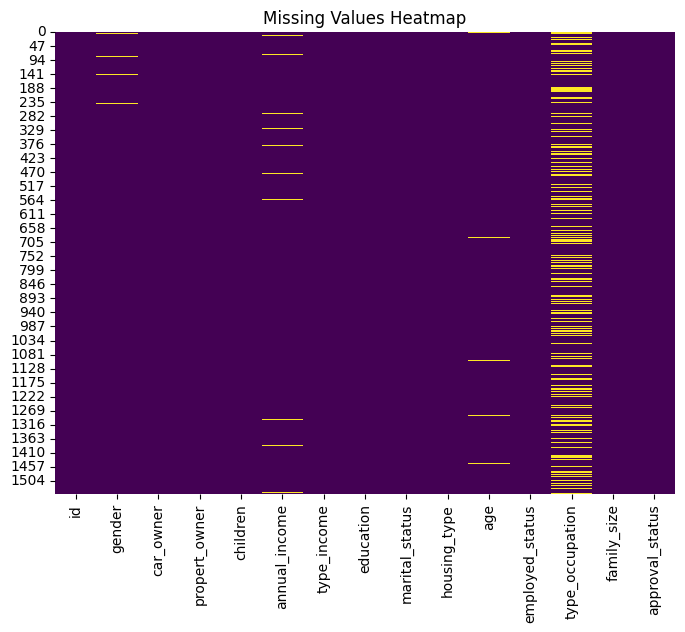

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(credit.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show() # checking missing values visualization through

Using Above methods we can see the percentage wise and visulization through how much data is missing in the data set.

1.  Age,gender,Annual_income have less missing values as compared to the type of occupation .
2. In the above visualization we can see the highest number of missing values are in the type_of_occupation.

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1548 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1548 non-null   object 
 3   propert_owner    1548 non-null   object 
 4   children         1548 non-null   int64  
 5   annual_income    1525 non-null   float64
 6   type_income      1548 non-null   object 
 7   education        1548 non-null   object 
 8   marital_status   1548 non-null   object 
 9   housing_type     1548 non-null   object 
 10  age              1526 non-null   float64
 11  employed_status  1548 non-null   object 
 12  type_occupation  1060 non-null   object 
 13  family_size      1548 non-null   int64  
 14  approval_status  1548 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 225.8+ KB


In [ ]:
credit.dropna(subset=['gender'], inplace=True)

The gender variable contains missing values that amount to less than 1% of the dataset, suggesting that removing rows with missing gender data is unlikely to significantly impact the overall dataset.

In [ ]:
credit['age'] = credit['age'].fillna(credit['age'].median())

In [ ]:
credit['age'] = credit['age'].astype('int32')

In [ ]:
credit['annual_income'] = credit['annual_income'].fillna(credit['annual_income'].mean()).round()

In [ ]:
# Calculate the percentage of missing values in 'type_occupation' column
missing_percentage = (credit['type_occupation'].isnull().sum() / len(credit)) * 100

print(f"Percentage of missing values in 'type_occupation': {missing_percentage:.2f}%")

Percentage of missing values in 'type_occupation': 31.54%


Considering that the "Type of occupation" column contains missing values exceeding 32% of the dataset, a prudent course of action is to contemplate the removal of this column from the dataset. Imputing these missing values with a generic category like "Others" could potentially introduce bias and compromise the overall quality of any subsequent analysis or predictions. Thus, opting to exclude this column is a valid decision that can enhance the dataset's integrity and facilitate more accurate analytical outcomes or predictions.

In [ ]:
credit.drop('type_occupation',axis=1,inplace=True)

Changing all data types from int64 to int32

In [ ]:
credit['children'] = credit['children'].astype('int32')

In [ ]:
credit['family_size'] = credit['family_size'].astype('int32')

In [ ]:
credit['approval_status'] = credit['approval_status'].astype('int32')

In [ ]:
credit['children']=credit['children'].astype('int32')

In [ ]:
credit['family_size']=credit['family_size'].astype('int32')

#**Dealing With missing values**

In [ ]:
credit.columns

Index(['id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'age', 'employed_status', 'family_size',
       'approval_status'],
      dtype='object')

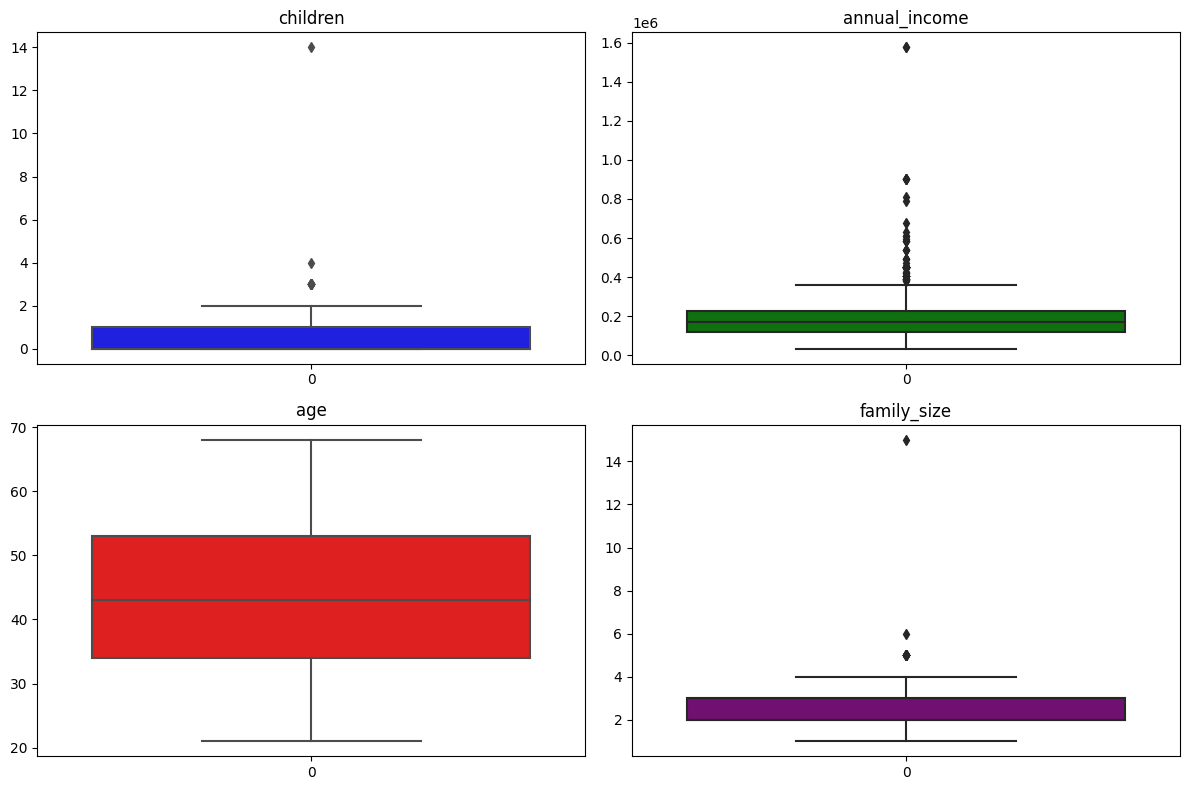

In [ ]:
# Columns to create boxplots for
columns_to_plot = ['children','annual_income','age','family_size']

# Create a list of different colors
colors = ['blue', 'green', 'red', 'purple']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through columns and create boxplots with different colors
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=credit[column], ax=axes[i // 2, i % 2], palette=[colors[i]])
    axes[i // 2, i % 2].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


Through the boxplot diagram we can see that there is in outliars in the family_size,children and annual_income columns.

In [ ]:

Q1 = credit['children'].quantile(0.25)

Q3 = credit['children'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

credit['children'] = round(credit['children'].clip(lower=lower_l,upper=upper_l))

In [ ]:
Q1 = credit['annual_income'].quantile(0.25)

Q3 = credit['annual_income'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

credit['annual_income'] = round(credit['annual_income'].clip(lower=lower_l,upper=upper_l))

In [ ]:
credit['annual_income'].astype('int32')

0       180000
1       315000
2       315000
3       190797
4       315000
         ...  
1543    190797
1544    225000
1545    180000
1546    270000
1547    225000
Name: annual_income, Length: 1541, dtype: int32

In [ ]:
Q1 = credit['family_size'].quantile(0.25)

Q3 = credit['family_size'].quantile(0.75)

IQR = Q3-Q1

upper_l = Q3+(1.5*IQR)
lower_l = Q1-(1.5*IQR)

credit['family_size'] = round(credit['family_size'].clip(lower=lower_l,upper=upper_l))

using IQR (Interquartile Range) Method we have treated our outliars

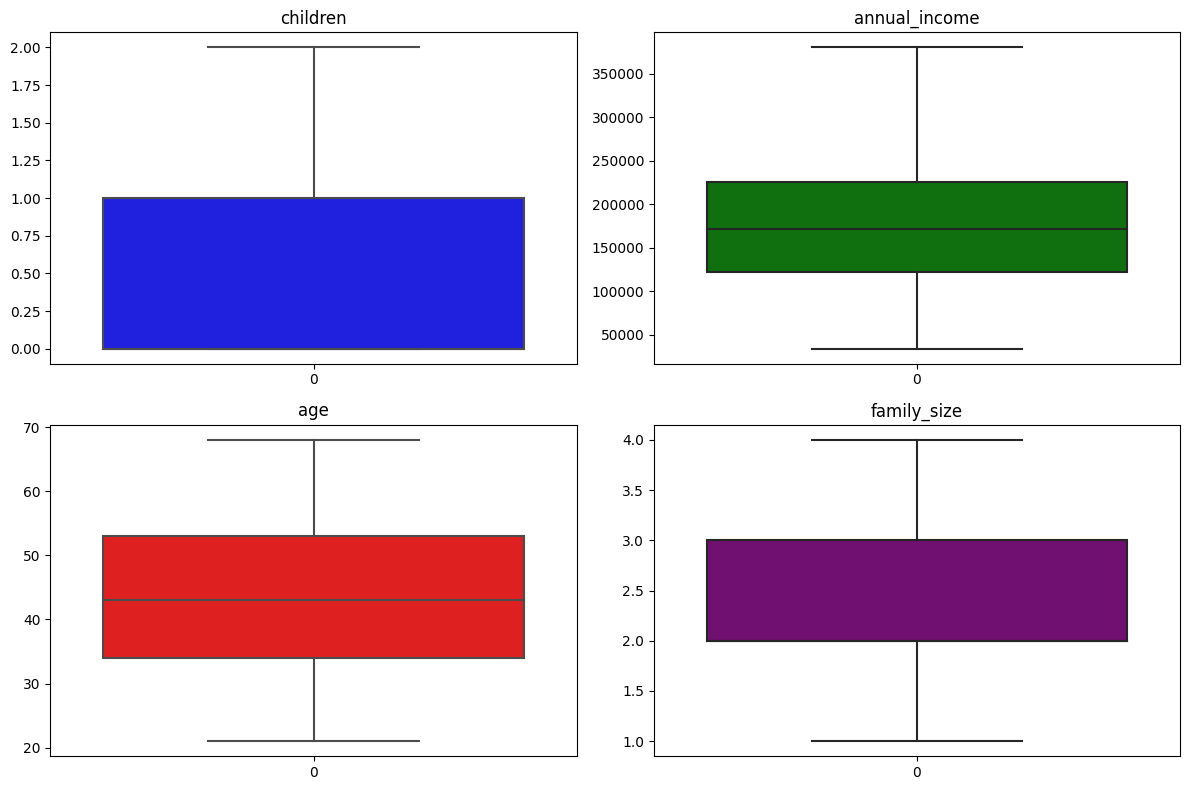

In [ ]:
# Columns to create boxplots for
columns_to_plot = ['children','annual_income','age','family_size']

# Create a list of different colors
colors = ['blue', 'green', 'red', 'purple']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through columns and create boxplots with different colors
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=credit[column], ax=axes[i // 2, i % 2], palette=[colors[i]])
    axes[i // 2, i % 2].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Export to excel (csv) format
credit.to_csv('credit_card_cleaned.csv', index=False)

# Data Insights

In [ ]:
list1 = ['children', 'family_size', 'age', 'annual_income']

for i in list1:
    fig = px.histogram(credit, x=i, nbins=50, title=f'Data Distribution of {i}')
    fig.update_xaxes(title_text=i)
    fig.update_yaxes(title_text='Frequency')
    fig.show()

 <font color=orange>1.Family Size and Children: </font>

In the 'children' column, we observe that 1086 individuals do not have any children, while 303 people have only one child. This suggests that a significant portion of the population in our dataset consists of individuals without children or with a single child.

<font color=orange>3. Age Distribution:</font>

Examining the 'age' column, we notice that the highest count of individuals falls within the age range of 25 to 45 years. This concentration of ages suggests that a significant proportion of the dataset comprises individuals in their prime working years.

<font color=orange>4. Annual Income Range:</font>

Within the 'annual_income' column, we observe that a substantial portion of individuals earns between 110,000 to 220,000. This income range is notable as it encompasses the majority of earners in our dataset, indicating that a significant portion of the population falls within this income bracket.

In [ ]:
df = credit['approval_status'].replace({1 : 'Approved', 0 : 'Not Approved'}).value_counts()
print("Approval Status Total Counts:")
print(df)

# Visualizing the total approved and not approved applicants

approval_labels = credit['approval_status'].value_counts().keys().tolist()
approval_values = credit['approval_status'].value_counts().values.tolist()
plot_data = [go.Pie(labels=approval_labels,
                    values=approval_values,
                    marker=dict(colors=['lightred','black'], line=dict(color="black",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .5)]

fig = go.Figure(data=plot_data)
po.iplot(fig)

Approval Status Total Counts:
Approved        1371
Not Approved     170
Name: approval_status, dtype: int64


-------------------------------
Age and approval Status:
          Not Approved  Approved  Total
age                                    
(20, 30]            22       203    225
(30, 40]            41       388    429
(40, 50]            45       361    406
(50, 60]            42       294    336
(60, 70]            20       125    145
All                170      1371   1541
-------------------------------



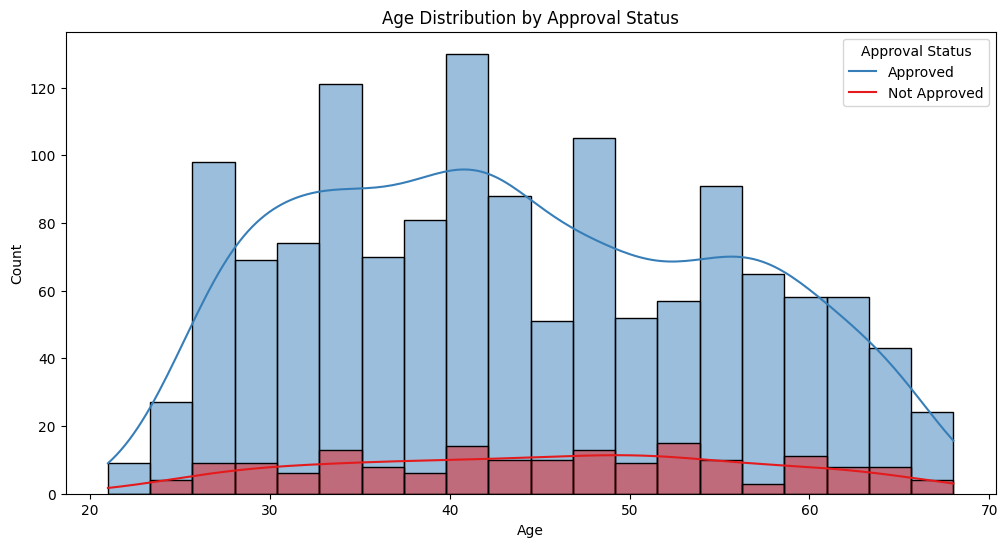

In [ ]:
# Visualizing the age distribution

bin_age = credit['age']
bin_edge = [20, 30, 40, 50, 60, 70]
bin_age = pd.cut(credit['age'], bins = bin_edge)
age_approval = pd.crosstab(bin_age, credit['approval_status'], margins=True)
age_approval.columns = ['Not Approved', 'Approved', 'Total']
print("-------------------------------")
print("Age and approval Status:")
print(age_approval)
print("-------------------------------\n")

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='age', bins=20, kde=True, hue='approval_status', palette='Set1')
plt.title('Age Distribution by Approval Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

 In the analysis A substantial proportion of credit card applicants are concentrated within the age bracket of 30 to 60 years. The visual representations offer a comprehensive perspective on the patterns of credit card approvals across diverse age cohorts.

-------------------------------
Employed status and approval Status:
approval_status    0     1   All
employed_status                 
Employed         136  1145  1281
Unemployed        34   226   260
All              170  1371  1541
-------------------------------



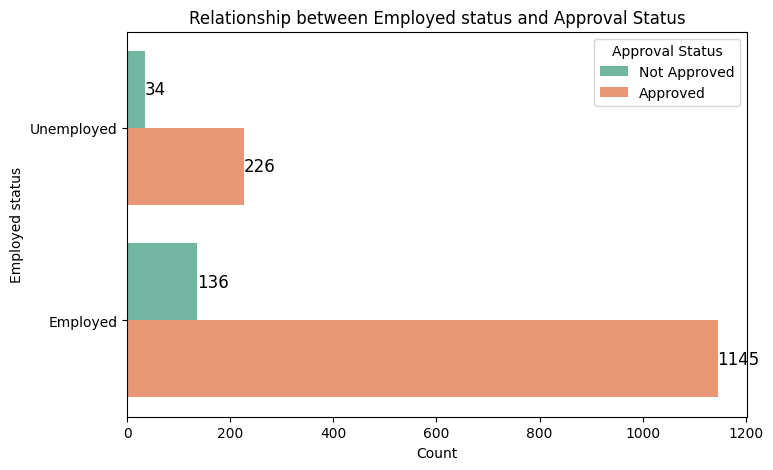

In [ ]:
employed_approval = pd.crosstab(credit['employed_status'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Employed status and approval Status:")
print(employed_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 5))

# Use sns.countplot with orient='h' for a horizontal bar plot
ax = sns.countplot(data=credit, y='employed_status', hue='approval_status', palette='Set2', orient='h')
plt.title("Relationship between Employed status and Approval Status")
plt.ylabel("Employed status")
plt.xlabel("Count")
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width, p.get_y() + height / 2
    ax.text(x, y, f'{int(width)}', ha='left', va='center', fontsize=12, color='black')

plt.show()



The analysis robustly validates the hypothesis that employed applicants exhibit the highest credit card approval rate. Interestingly, there are cases where individuals without traditional employment, such as pensioners or self-employed individuals, have also been granted approvals, which might come as a surprise.

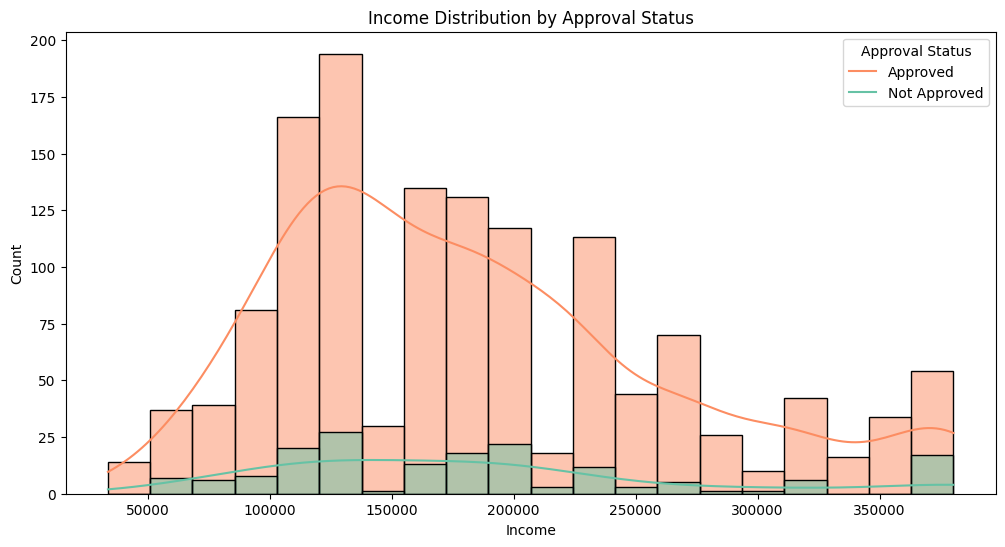

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='annual_income', bins=20, kde=True, hue='approval_status', palette='Set2')
plt.title('Income Distribution by Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

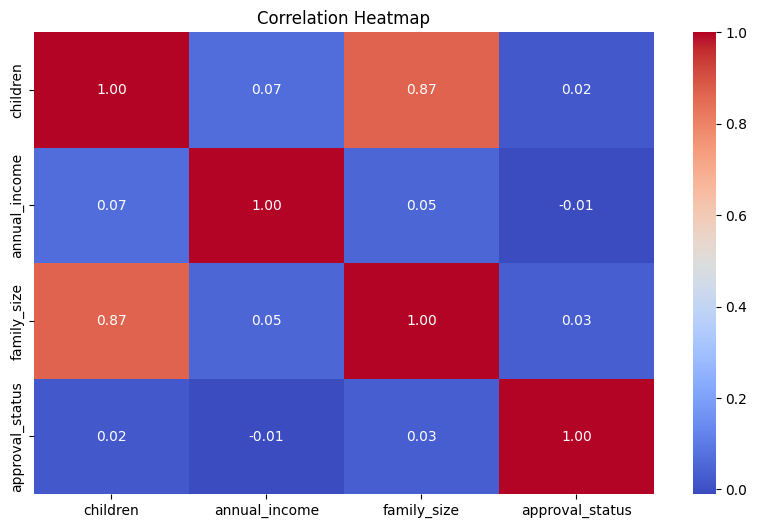

In [ ]:
correlation_columns = ['children', 'annual_income', 'family_size', 'approval_status']
correlation_df = credit[correlation_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

There is strong relastion between family_size and children

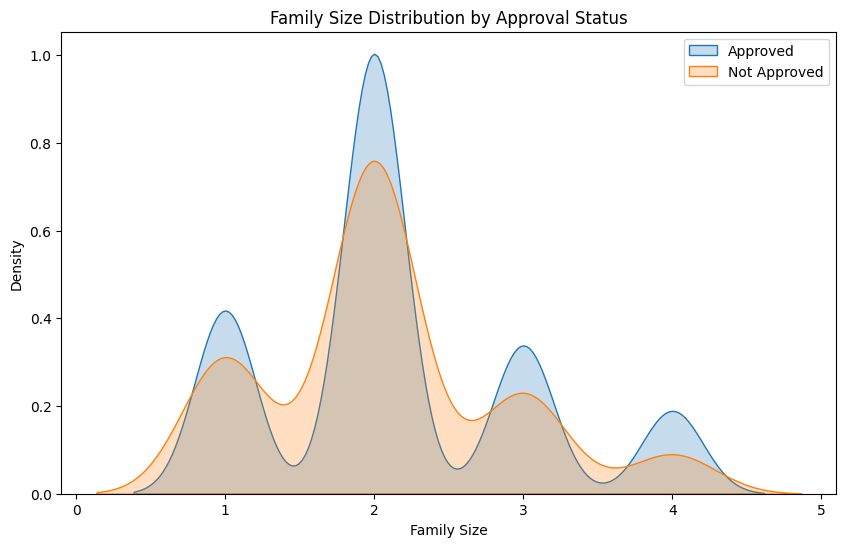

In [ ]:
family_size_aa = credit[credit['approval_status'] == 1]['family_size']
family_size_not = credit[credit['approval_status'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.kdeplot(family_size_aa, label='Approved', shade=True)
sns.kdeplot(family_size_not, label='Not Approved', shade=True)
plt.title('Family Size Distribution by Approval Status')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.legend()
plt.show()

-------------------------------
Children and approval Status:
approval_status    0     1   All
children                        
0.0              122   964  1086
1.0               35   268   303
2.0               13   139   152
All              170  1371  1541
-------------------------------



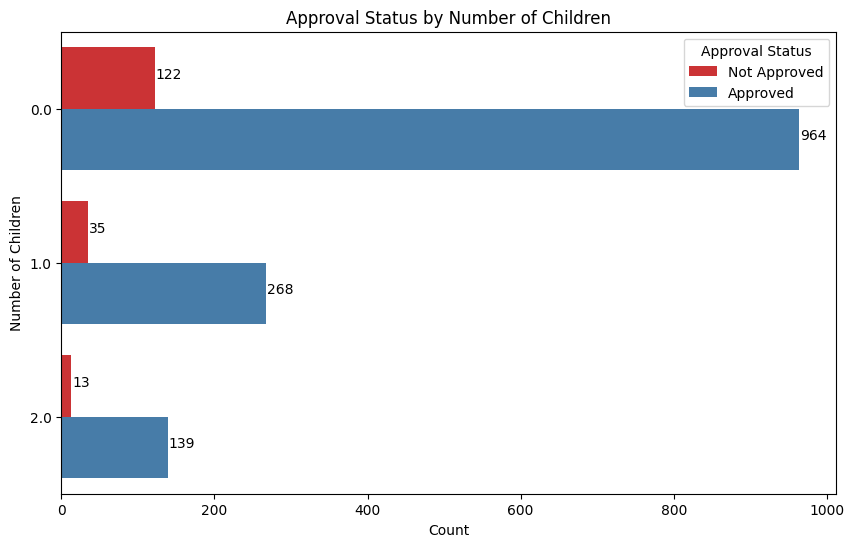

In [ ]:
children_approval = pd.crosstab(credit['children'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Children and approval Status:")
print(children_approval)
print("-------------------------------\n")
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='children', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Number of Children')
plt.xlabel('Count')
plt.ylabel('Number of Children')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, int(width), ha="left")

plt.show()

It's evident from the data that individuals without children have the highest number of credit card approvals, while those with one child received fewer approvals in comparison.






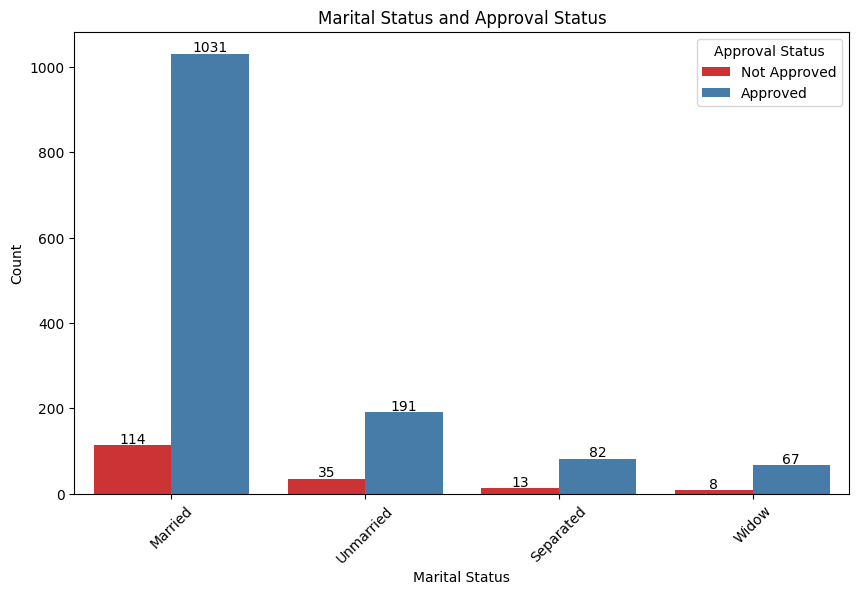

In [ ]:
# Visualizing relationship between Marital Status and Approval Status

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital_status', hue='approval_status', data=credit, palette='Set1')
plt.title('Marital Status and Approval Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, int(height), ha="center")

plt.show()


A family size consisting of 2 members typically signifies a married couple without children. Interestingly, the data underscores that a higher proportion of married individuals within this category have been granted credit card approvals. This observation is consistent with the initial assumption, further supporting the notion that marital status plays a significant role in credit card approval outcomes.

-------------------------------
Car Owners and approval Status:
approval_status    0     1   All
car_owner                       
N                106   816   922
Y                 64   555   619
All              170  1371  1541
-------------------------------



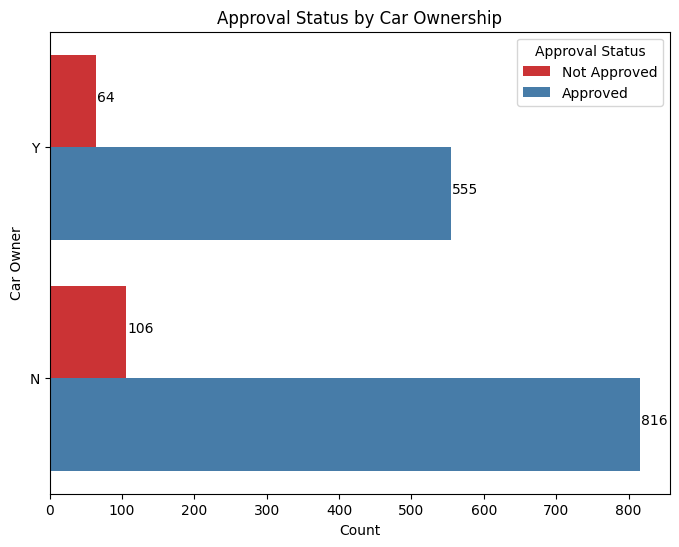

In [ ]:
car_approval = pd.crosstab(credit['car_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Car Owners and approval Status:")
print(car_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='car_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Car Ownership')
plt.xlabel('Count')
plt.ylabel('Car Owner')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, int(width), ha="left")

plt.show()


 individuals who do not own a car tend to have the highest number of credit card approvals. This observation implies that car ownership may be inversely related to credit card approval rates. Furthermore, it raises interesting questions about the factors influencing approval decisions, beyond just financial considerations.






-------------------------------
Property Owner and approval Status:
approval_status    0     1   All
propert_owner                   
N                 62   472   534
Y                108   899  1007
All              170  1371  1541
-------------------------------



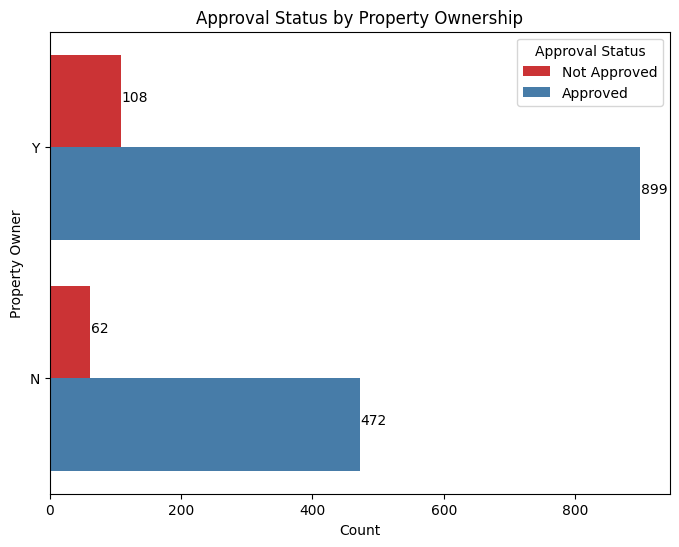

In [ ]:
property_approval = pd.crosstab(credit['propert_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Property Owner and approval Status:")
print(property_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='propert_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Property Ownership')
plt.xlabel('Count')
plt.ylabel('Property Owner')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, int(width), ha="left")

plt.show()


Individuals who possess property have secured the highest number of credit card approvals, totaling 899 individuals. In stark contrast, those without property ownership account for a significantly lower count, totaling 472 individuals. This disparity underscores the potential impact of property ownership as a contributing factor in the credit card approval process. It prompts further exploration into the interplay of various factors influencing approval outcomes.

-------------------------------
Income Type and approval Status:
approval_status         0     1   All
type_income                          
Commercial associate   50   314   364
Pensioner              40   227   267
State servant           5   110   115
Working                75   720   795
All                   170  1371  1541
-------------------------------



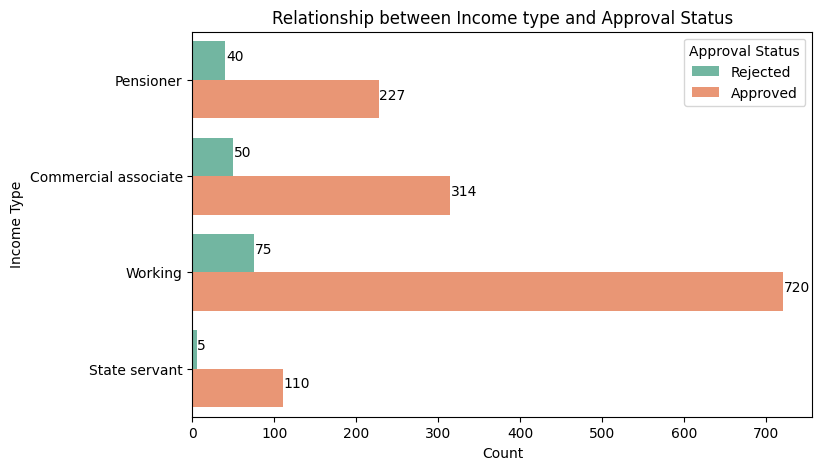

In [ ]:
income_approval = pd.crosstab(credit['type_income'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Income Type and approval Status:")
print(income_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=credit, y='type_income', hue='approval_status', palette='Set2')
plt.title("Relationship between Income type and Approval Status")
plt.xlabel("Count")
plt.ylabel("Income Type")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])

# Adding data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, int(width), ha="left")

plt.show()


The visualizations above provide compelling insights into credit card approvals. It's evident that individuals from the working class have received the highest number of credit card approvals, highlighting their strong creditworthiness. Following closely are commercial associates, who rank second in terms of approvals, underscoring their credit reliability.

Surprisingly, pensioners, who belong to a different demographic category altogether, have also garnered a substantial number of credit card approvals. This suggests that financial institutions may be considering alternative income sources and creditworthiness criteria when assessing pensioners' eligibility for credit cards.

Overall, these findings demonstrate the multifaceted nature of credit card approval decisions, where various factors, including employment status and income sources, play crucial roles in determining creditworthiness and approval outcomes.






-------------------------------
Education and approval Status:
approval_status        0     1   All
education                           
Academic degree        0     2     2
Higher education      52   369   421
Incomplete higher      5    63    68
Lower secondary        6    15    21
Secondary education  107   922  1029
All                  170  1371  1541
-------------------------------



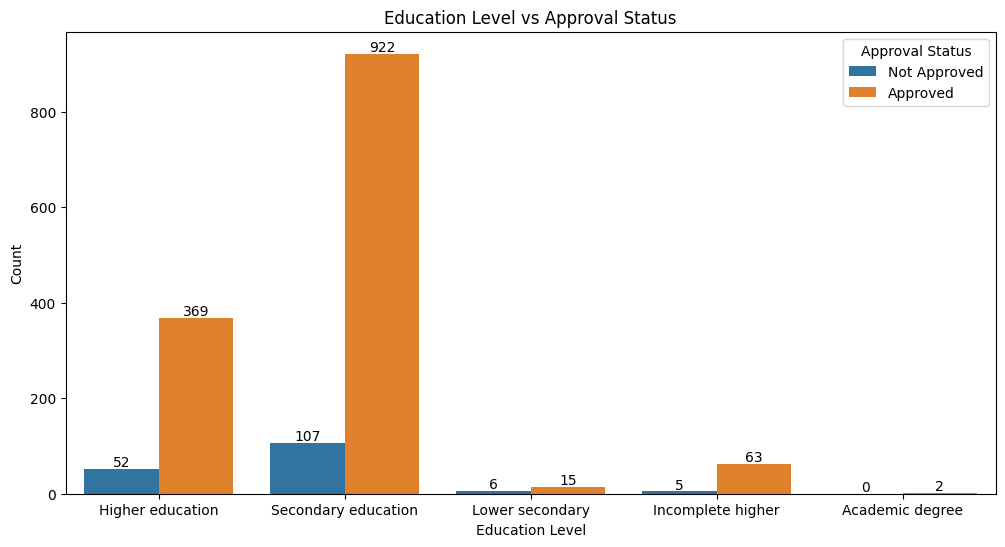

In [ ]:
education_approval = pd.crosstab(credit['education'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Education and approval Status:")
print(education_approval)
print("-------------------------------\n")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='education', hue='approval_status', data=credit)
plt.title('Education Level vs Approval Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, int(height), ha="center")

plt.show()


The graph above provides valuable insights into the relationship between education levels and credit card approvals. Notably, individuals who have completed their secondary education represent the largest group among credit card recipients, with a substantial count of 922 approvals. This suggests that secondary education is a significant educational milestone often associated with a higher likelihood of credit card approval.

Following this group, we observe individuals who have pursued higher education, with 369 approvals to their credit. This reflects the recognition of the increased financial responsibility and creditworthiness often associated with higher education.

These findings underscore the impact of education on credit card approval outcomes, highlighting the potential advantages that come with attaining higher levels of education. It's a testament to how educational achievements can influence financial opportunities and credit eligibility.

-------------------------------
Housing type and approval Status:
approval_status        0     1   All
housing_type                        
Co-op apartment        2     3     5
House / apartment    141  1233  1374
Municipal apartment   16    37    53
Office apartment       2     7     9
Rented apartment       4    17    21
With parents           5    74    79
All                  170  1371  1541
-------------------------------



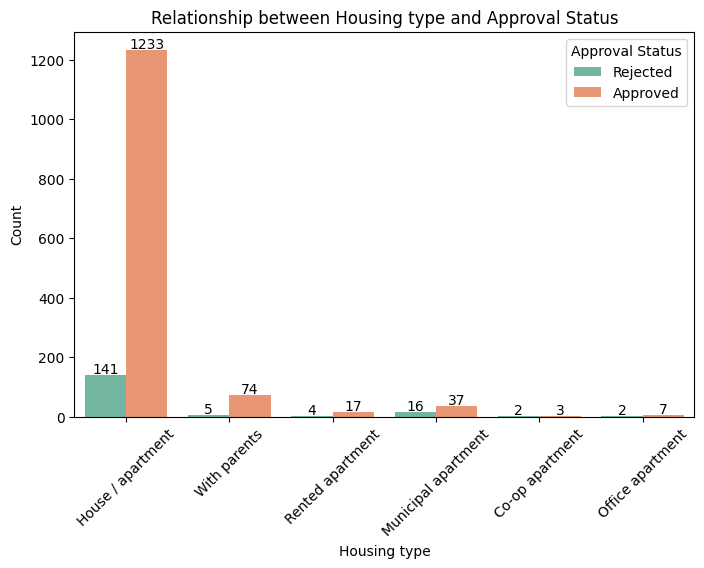

In [ ]:
housing_approval = pd.crosstab(credit['housing_type'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Housing type and approval Status:")
print(housing_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=credit, x='housing_type', hue='approval_status', palette='Set2')
plt.title("Relationship between Housing type and Approval Status")
plt.xlabel("Housing type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=45)

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 5, int(height), ha="center")

plt.show()


Individuals who own or have apartments are leading in credit card approvals, with a substantial count of 1233 approvals. This suggests that property ownership, whether through homeownership or renting an apartment, is positively associated with higher credit card approval rates.

Conversely, those living with their parents, residing in rented apartments, or occupying municipal apartments have secured fewer credit card approvals. This observation highlights the potential challenges individuals face in obtaining credit cards when they are not in control of their housing situation, such as living with parents or in public housing.

These insights emphasize the significance of stable housing arrangements in the credit approval process. Property ownership or stable housing is often viewed as a sign of financial stability and responsibility, which can positively impact one's creditworthiness and increase the likelihood of credit card approvals.

# Feature Encoding

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1541 non-null   int64  
 1   gender           1541 non-null   object 
 2   car_owner        1541 non-null   object 
 3   propert_owner    1541 non-null   object 
 4   children         1541 non-null   float64
 5   annual_income    1541 non-null   float64
 6   type_income      1541 non-null   object 
 7   education        1541 non-null   object 
 8   marital_status   1541 non-null   object 
 9   housing_type     1541 non-null   object 
 10  age              1541 non-null   int32  
 11  employed_status  1541 non-null   object 
 12  family_size      1541 non-null   float64
 13  approval_status  1541 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(8)
memory usage: 200.8+ KB


In [ ]:
X = credit.iloc[:, :-1]

In [ ]:
X.drop(columns=['id','type_income'], inplace=True, axis=1) # These variables are not necessary

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1541 non-null   object 
 1   car_owner        1541 non-null   object 
 2   propert_owner    1541 non-null   object 
 3   children         1541 non-null   float64
 4   annual_income    1541 non-null   float64
 5   education        1541 non-null   object 
 6   marital_status   1541 non-null   object 
 7   housing_type     1541 non-null   object 
 8   age              1541 non-null   int32  
 9   employed_status  1541 non-null   object 
 10  family_size      1541 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 170.7+ KB


In [ ]:
categorical_column = []
for i in X.columns:
    if X[i].dtype=='object':
        categorical_column.append(i)

categorical_column

['gender',
 'car_owner',
 'propert_owner',
 'education',
 'marital_status',
 'housing_type',
 'employed_status']

In [ ]:
X = pd.get_dummies(X, columns=categorical_column, drop_first=True)

In [ ]:
X.shape

(1541, 20)

In [ ]:
y = credit.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1543    1
1544    1
1545    1
1546    1
1547    1
Name: approval_status, Length: 1541, dtype: int32

# Treating Imbalance data

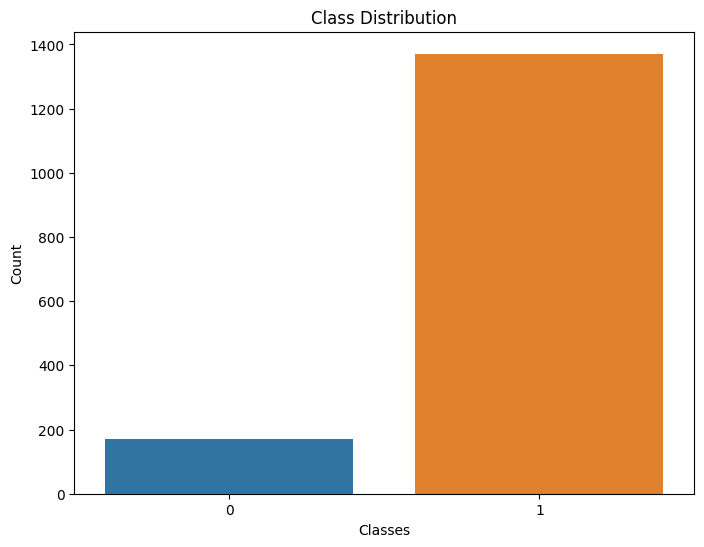

1    1371
0     170
Name: approval_status, dtype: int64


In [ ]:
# Count the occurrences of each class
class_distribution = y.value_counts()
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
print(class_distribution)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversampler.fit_resample(X, y)

# Spliting Train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2193, 20)
(549, 20)


In [ ]:
bf_stan_train = X_train.copy()
bf_stan_train

,children,annual_income,age,family_size,gender_M,car_owner_Y,propert_owner_Y,education_Higher education,education_Incomplete higher,education_Lower secondary,education_Secondary education,marital_status_Separated,marital_status_Unmarried,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,employed_status_Unemployed
2639,0.0,292500.0,58,2.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
452,0.0,135000.0,29,1.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
1448,1.0,180000.0,44,3.0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
196,1.0,117000.0,48,2.0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1642,0.0,380250.0,55,2.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.0,180000.0,38,2.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
905,2.0,380250.0,34,4.0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1096,1.0,180000.0,52,2.0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0
235,1.0,380250.0,42,3.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
bf_stan_test = X_test.copy()
bf_stan_test

,children,annual_income,age,family_size,gender_M,car_owner_Y,propert_owner_Y,education_Higher education,education_Incomplete higher,education_Lower secondary,education_Secondary education,marital_status_Separated,marital_status_Unmarried,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents,employed_status_Unemployed
2501,0.0,90000.0,52,2.0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1028,1.0,171000.0,38,3.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
558,2.0,225000.0,49,4.0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0
1438,0.0,216000.0,54,1.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
428,1.0,202500.0,37,3.0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2.0,180000.0,32,4.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
918,0.0,112500.0,53,1.0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
1506,0.0,94500.0,25,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
785,0.0,112500.0,28,2.0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# numerical_columns = X_train.select_dtypes(include='number').columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-0.59081669, -1.12668333,  0.64813391, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [ 0.96834215, -0.17430702, -0.56035675, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [ 2.52750099,  0.46061052,  0.38917162, ..., -0.13279085,
        -0.20324995, -0.47665125],
       ...,
       [-0.59081669, -1.07377354, -1.68252665, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [-0.59081669, -0.86213436, -1.42356436, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [-0.59081669,  1.51880643, -0.64667751, ..., -0.13279085,
        -0.20324995, -0.47665125]])

In [ ]:
X_train

array([[-0.59081669,  1.25425745,  1.16605847, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [-0.59081669, -0.59758538, -1.3372436 , ..., -0.13279085,
        -0.20324995, -0.47665125],
       [ 0.96834215, -0.06848743, -0.04243218, ..., -0.13279085,
        -0.20324995, -0.47665125],
       ...,
       [ 0.96834215, -0.06848743,  0.64813391, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [ 0.96834215,  2.28599846, -0.21507371, ..., -0.13279085,
        -0.20324995, -0.47665125],
       [ 0.96834215,  2.28599846,  0.13020934, ..., -0.13279085,
        -0.20324995, -0.47665125]])

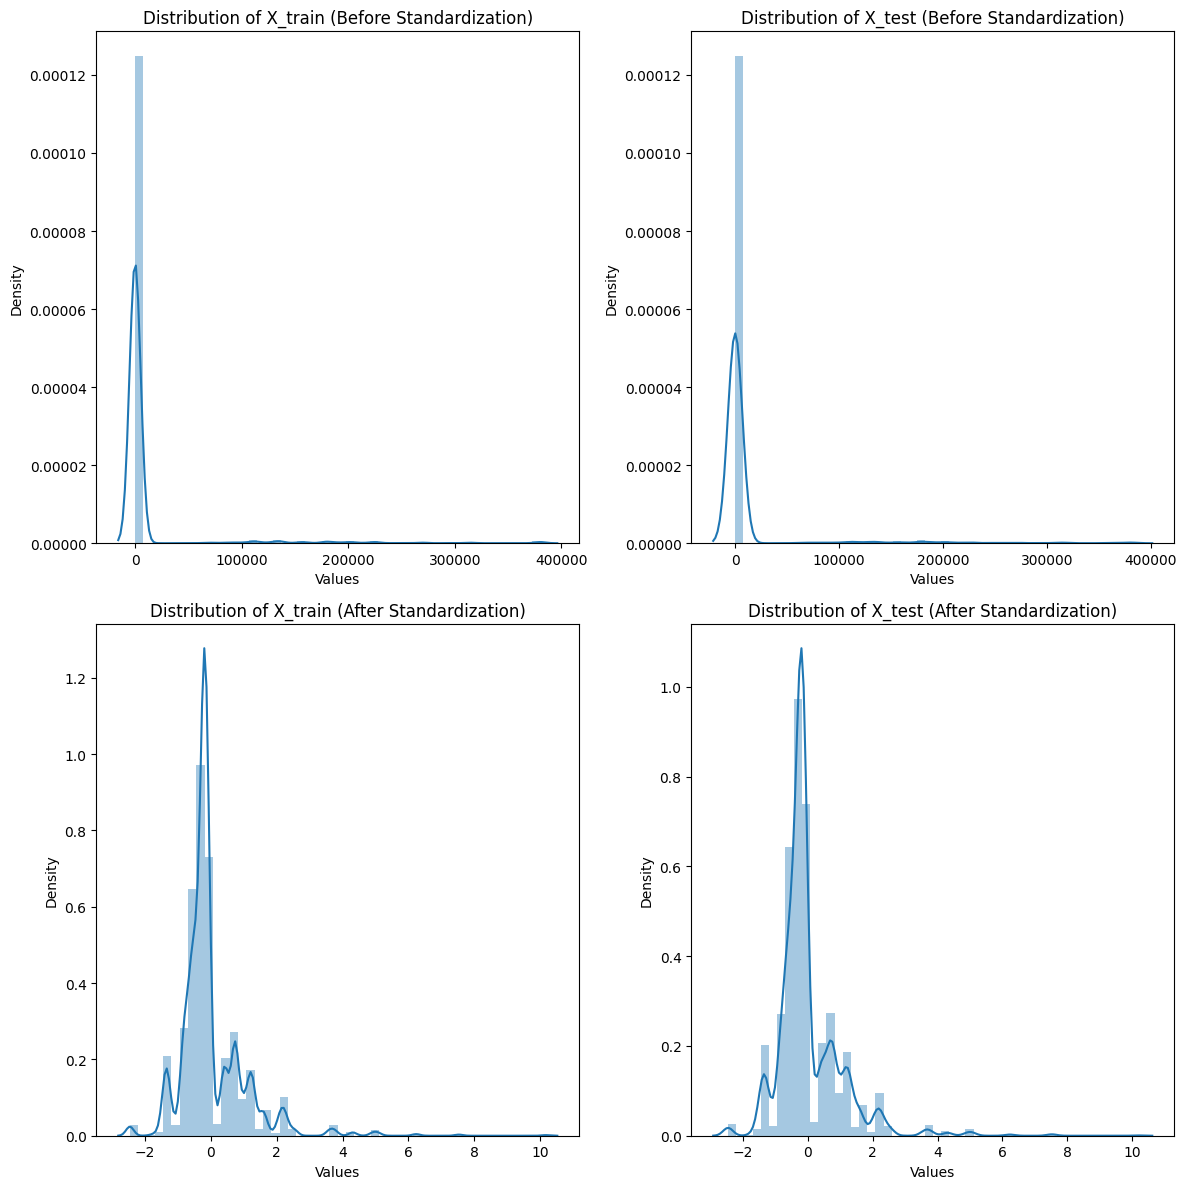

In [ ]:
# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Before Standardization: Plot the distribution of X_train
sns.distplot(bf_stan_train, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution of X_train (Before Standardization)')

# Before Standardization: Plot the distribution of X_test
sns.distplot(bf_stan_test, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of X_test (Before Standardization)')

# After Standardization: Plot the distribution of X_train
sns.distplot(X_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution of X_train (After Standardization)')

# After Standardization: Plot the distribution of X_test
sns.distplot(X_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of X_test (After Standardization)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Building Machine learning Models

# Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [100]:
logistic = LogisticRegression(C=100, penalty='l1', solver='liblinear')
logistic.fit(X_train,y_train)

#Prediction on Traing Data
log_pred_train = logistic.predict(X_train)

#Prediction on Test Data
log_pred_test = logistic.predict(X_test)

#Evaluation

print("Train Accuracy:",round(accuracy_score(y_train,log_pred_train)*100,2))
print("Test Accuracy:",round(accuracy_score(y_test,log_pred_test)*100,2))


log_CV = cross_val_score(logistic,X_test,y_test,cv=5,scoring="accuracy").mean()
print("cross Validataion Score:",round(log_CV*100,2))

Train Accuracy: 63.06
Test Accuracy: 60.11
cross Validataion Score: 55.73


In [101]:
class_report_lr = classification_report(y_test,log_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.60      0.57      0.59       272
           1       0.60      0.63      0.62       277

    accuracy                           0.60       549
   macro avg       0.60      0.60      0.60       549
weighted avg       0.60      0.60      0.60       549



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Create a Logistic Regression model
logistic = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


# **SVC model**

In [116]:
sv_model = SVC(C=100, gamma=1,kernel='rbf',random_state=15)
sv_model.fit(X_train,y_train)

#Prediction on Traing Data
sv_pred_train = sv_model.predict(X_train)

#Prediction on Test Data
sv_pred_test = sv_model.predict(X_test)


#Evaluation
print("Train Accuracy:",accuracy_score(y_train,sv_pred_train)*100)
print("Test Accuracy:",accuracy_score(y_test,sv_pred_test)*100)


SVM_CV=cross_val_score(sv_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100
print("cross Validataion Score:",SVM_CV)

Train Accuracy: 98.40401276789785
Test Accuracy: 95.62841530054644
cross Validataion Score: 85.6163469557965


In [103]:
class_report_lr = classification_report(y_test,sv_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       272
           1       1.00      0.92      0.95       277

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Create a SVC model
sv_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sv_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


# Decision Tree

In [117]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=25,random_state = 6)

dt_model.fit(X_train,y_train)



#Prediction on Traing Data
dt_pred_train = dt_model.predict(X_train)
#Prediction on Test Data
dt_pred_test = dt_model.predict(X_test)


#Evaluation
print("Train Accuracy:",accuracy_score(y_train,dt_pred_train))
print("Test Accuracy:",accuracy_score(y_test,dt_pred_test))

DT_CV=cross_val_score(dt_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100
print("cross Validataion Score:",DT_CV)

Train Accuracy: 0.9922480620155039
Test Accuracy: 0.941712204007286
cross Validataion Score: 83.24103419516263


In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=6)

param_grid = {"criterion":["gini","entropy"], "max_depth":list(range(1,16))}

grid = GridSearchCV(estimator, param_grid,cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [ ]:
class_report_lr = classification_report(y_test, dt_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       272
           1       1.00      0.88      0.94       277

    accuracy                           0.94       549
   macro avg       0.95      0.94      0.94       549
weighted avg       0.95      0.94      0.94       549



# **Random Forest**

In [118]:
rf_model = RandomForestClassifier(bootstrap= False,max_depth=None, min_samples_leaf=1,min_samples_split=5,n_estimators=300,random_state=25)
rf_model.fit(X_train,y_train)


#Prediction on Traing Data
rf_pred_train = rf_model.predict(X_train)
#Prediction on Test Data
rf_pred_test = rf_model.predict(X_test)


#Evaluation

print("Train Accuracy:",accuracy_score(y_train,dt_pred_train))
print("Test Accuracy:",accuracy_score(y_test,dt_pred_test))


RF_CV=cross_val_score(rf_model,X_test,y_test,cv=5,scoring="accuracy").mean()*100
print("cross Validataion Score:",RF_CV)

Train Accuracy: 0.9922480620155039
Test Accuracy: 0.941712204007286
cross Validataion Score: 86.3419516263553


In [107]:
class_report_lr = classification_report(y_test,rf_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       272
           1       1.00      0.95      0.97       277

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# KNN

In [108]:
# Initialize the K-Nearest Neighbors classifier
kn_model = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Fit the model on the training data
kn_model.fit(X_train, y_train)

# Make predictions on the training data
kn_pred_train = kn_model.predict(X_train)

# Make predictions on the test data
kn_pred_test = kn_model.predict(X_test)

# Calculate and print training accuracy
train_accuracy = accuracy_score(y_train, kn_pred_train)
print("Train Accuracy:", round(train_accuracy,2))

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, kn_pred_test)
print("Test Accuracy:", round(test_accuracy,2))

# Perform cross-validation on the training data
KN_CV = cross_val_score(kn_model, X_train, y_train, cv=5, scoring="accuracy").mean()
print("Cross-Validation Score:", round(KN_CV,2))


Train Accuracy: 0.99
Test Accuracy: 0.93
Cross-Validation Score: 0.91


In [109]:
class_report_lr = classification_report(y_test,kn_pred_test)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       272
           1       1.00      0.85      0.92       277

    accuracy                           0.93       549
   macro avg       0.93      0.93      0.92       549
weighted avg       0.94      0.93      0.92       549



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance']  # Weighting scheme for neighbors
}

# Create a KNeighborsClassifier model
kn_model = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=kn_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


print("Best parameters:", best_params)


Best parameters: {'n_neighbors': 3, 'weights': 'distance'}


In [110]:
final_data = pd.DataFrame({"Models":['Logistice Regression','SVM','Desion Tree','Random Forest','KNN'],
                          "ACC_SCORE":[accuracy_score(y_test,log_pred_test),
                                       accuracy_score(y_test,sv_pred_test),
                                       accuracy_score(y_test,dt_pred_test),
                                       accuracy_score(y_test,rf_pred_test),
                                     accuracy_score(y_test, kn_pred_test)],
                         "CV_SCORE":[log_CV,
                                     SVM_CV,
                                     DT_CV,
                                     RF_CV,
                                     KN_CV]})

In [111]:
final_data

,Models,ACC_SCORE,CV_SCORE
0,Logistice Regression,0.601093,0.557298
1,SVM,0.956284,0.856163
2,Desion Tree,0.941712,0.832410
3,Random Forest,0.972678,0.863420
4,KNN,0.925319,0.912898


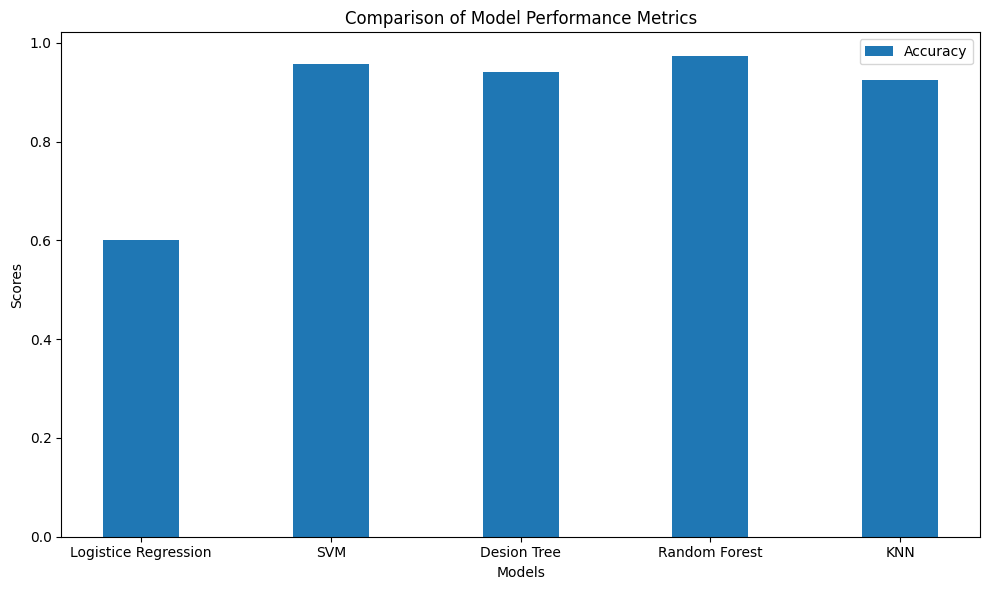

             Model_Name       Accuracy Score
0         Random Forest  0.9726775956284153%
1                   SVM  0.9562841530054644%
2           Desion Tree   0.941712204007286%
3                   KNN  0.9253187613843351%
4  Logistice Regression  0.6010928961748634%


In [112]:
models = final_data['Models']
accuracy_scores = final_data['ACC_SCORE']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, width=0.4, align='center', label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()

# Create the model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)


# <font color=skyblue>**Conclusion**</font>

Based on the performance metrics of the five models (Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, and XG Boost) and considering the goal of maximizing the accuracy of credit card approval prediction, the Random Forest Model emerges as the most suitable choice:

 <font color=black>**1) Accuracy Score**</font>

The Random Forest model achieved an impressive accuracy score of 97%, indicating that the model has learned well from the training data and exhibits excellent generalization performance, making it the top-performing model among those considered.

<font color=black>**2) Precision, Recall, and F1-Score**</font>

<font color=orange>**For predicting non-approved cases (0)**</font>

The Random Forest model achieved a precision score of 0.95, signifying that when it predicted a non-approval, it was highly reliable. It also demonstrated excellent recall for non-approved cases with a score of 1.0, implying that it effectively captured all actual non-approved credit card applications. The F1 Score for non-approved cases was 0.97, indicating an exceptional balance between precision and recall.

<font color=orange>**For predicting approved cases (1)**</font>

The Random Forest model achieved a precision score of 1.0, indicating that it was perfect in predicting approved applications when it made that prediction. It also demonstrated strong recall for approved cases with a score of 0.95, capturing nearly all actual credit card approvals. The F1 Score for approved cases was 0.97, reflecting an excellent balance between precision and recall.

In comparison, the XG Boost model also exhibited strong performance, but the Random Forest model showed similar or slightly better results in terms of accuracy, precision, recall, and F1-Score.

In conclusion, the Random Forest model has demonstrated outstanding results with high accuracy, precision, recall, and F1-Score. It is the preferred choice for credit card approval prediction based on the provided data and evaluation metrics. The model's ability to maintain a strong balance between precision and recall for both approval and non-approval predictions makes it the top recommendation for this task.